In [67]:
from hiive.mdptoolbox import example
import mdp
from utils import *

In [68]:
import gym, gym_walk, numpy as np
env = gym.make('WalkFive-v0')
pi = lambda x: np.random.randint(2)

In [69]:
env.observation_space.n

7

In [70]:
P, R = example.openai("WalkFive-v0", True)


[ABCDE]


P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


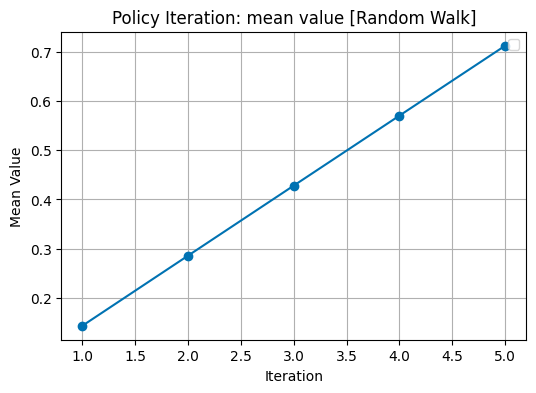

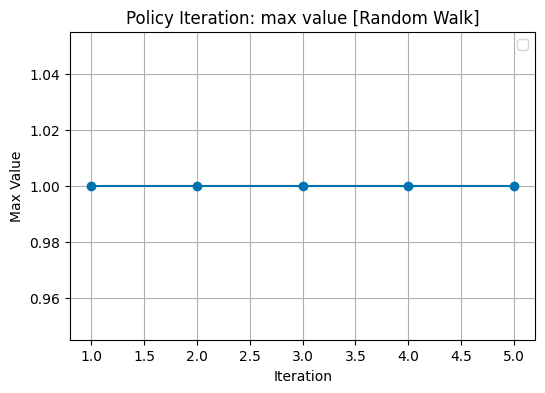

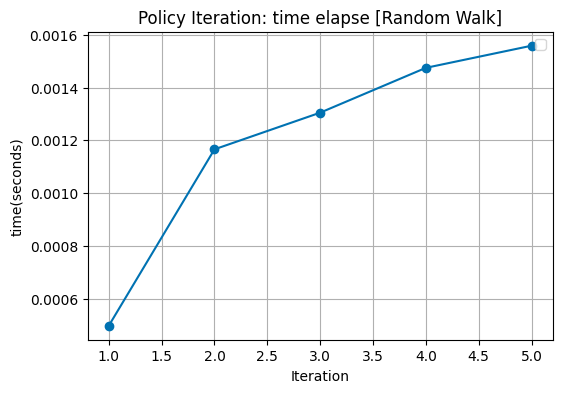

In [71]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
pi = mdp.PolicyIterationModified(**args)
pi.run()
print(pi)
pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(pi_result["Mean V"])
print("max mean v", max(pi_result["Mean V"]))
plot_data(pi_result["Iteration"], pi_result["Mean V"], 
                 "Iteration", "Mean Value", "Policy Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["Max V"], 
                 "Iteration", "Max Value", "Policy Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(pi_result["Iteration"], pi_result["times"], 
                 "Iteration", "time(seconds)", "Policy Iteration: time elapse [Random Walk]", figure_size=(6,4))

In [72]:
q_learning = mdp.QLearning(P, R, 0.99, epsilon=0.1,epsilon_decay=.95, n_iter=10**6, alpha=0.95, skip_check=True)
q_learning.run()
q_learning.policy

(0, 1, 1, 1, 1, 1, 0)

In [73]:
from QLearning import QLearningAgent
agent = QLearningAgent("WalkFive-v0")
agent.solve()

1.0

In [74]:
q_learning

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0.])
array([0., 0.])

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


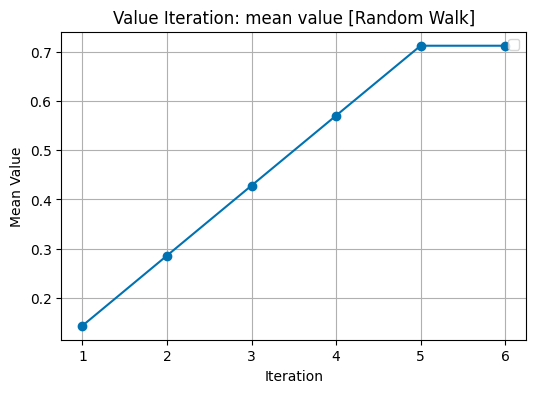

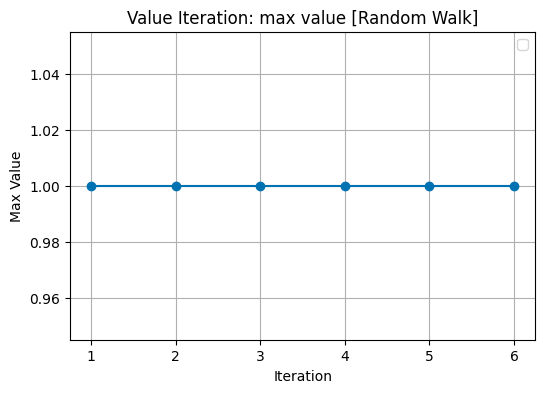

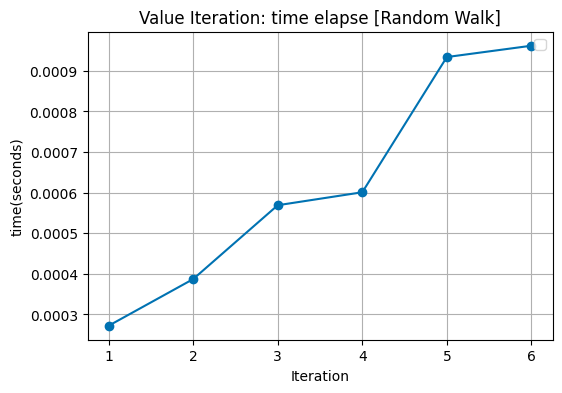

In [75]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))


P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


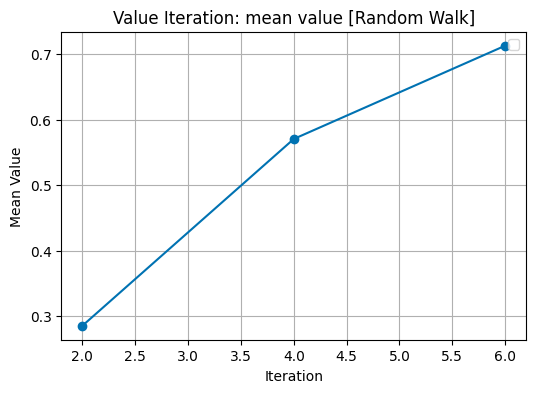

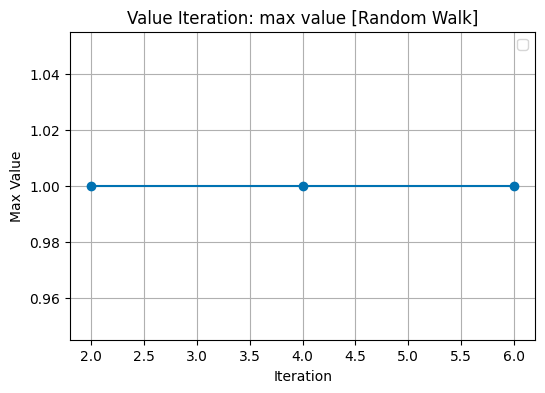

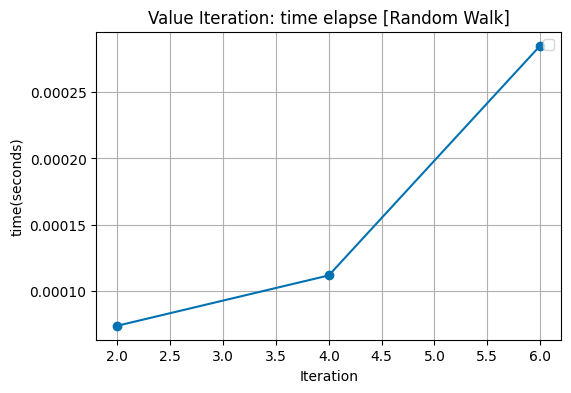

In [76]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":10**(-10), "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))


In [77]:
pi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.0,
  'Time': 0.0004968643188476562,
  'V[0]': 0.0,
  'Max V': 1.0,
  'Mean V': 0.14285714285714285,
  'Iteration': 1,
  'Value': array([0., 0., 0., 0., 0., 1., 0.]),
  'Policy': array([0, 0, 0, 0, 0, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.0010000000000000009,
  'Time': 0.0011658668518066406,
  'V[0]': 0.0,
  'Max V': 1.0,
  'Mean V': 0.2855714285714286,
  'Iteration': 2,
  'Value': array([0.   , 0.   , 0.   , 0.   , 0.999, 1.   , 0.   ]),
  'Policy': array([0, 0, 0, 0, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.001998999999999973,
  'Time': 0.0013048648834228516,
  'V[0]': 0.0,
  'Max V': 1.0,
  'Mean V': 0.428143,
  'Iteration': 3,
  'Value': array([0.      , 0.      , 0.      , 0.998001, 0.999   , 1.      ,
         0.      ]),
  'Policy': array([0, 0, 0, 1, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.002997000999999999

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

max mean v 0.7128585707144285


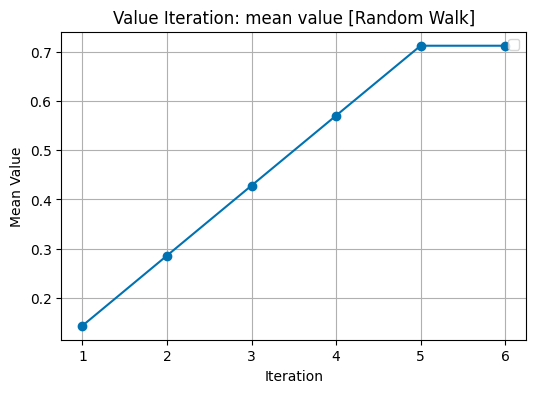

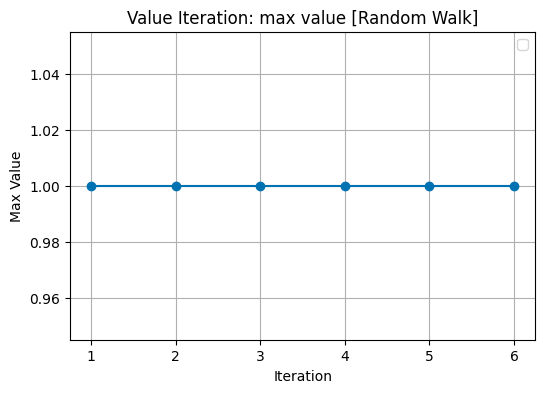

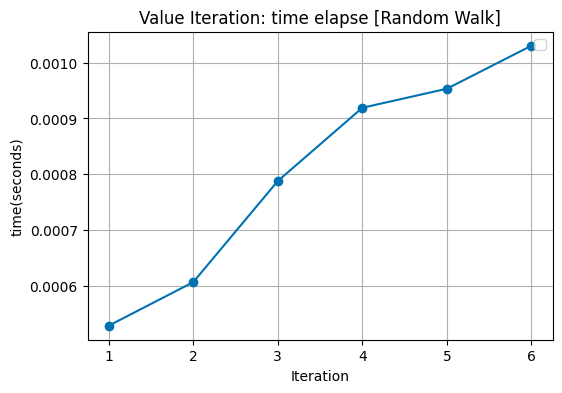

In [78]:
args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
vi = mdp.ValueIteration(**args)
vi.run()
print(vi)
vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration"])
num_iters = len(vi_result["Mean V"])
print("max mean v", max(vi_result["Mean V"]))
plot_data(vi_result["Iteration"], vi_result["Mean V"], 
                 "Iteration", "Mean Value", "Value Iteration: mean value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["Max V"], 
                 "Iteration", "Max Value", "Value Iteration: max value [Random Walk]", figure_size=(6,4))
plot_data(vi_result["Iteration"], vi_result["times"], 
                 "Iteration", "time(seconds)", "Value Iteration: time elapse [Random Walk]", figure_size=(6,4))

In [79]:
import mdp
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True, run_stat_frequency=1)
pi.run()
pi.policy
print("pi.policy", pi.policy)

pi.policy (0, 1, 1, 1, 1, 1, 0)


In [80]:
pi = mdp.PolicyIterationModified(P, R, 0.99999, epsilon=0.01, max_iter=10**6, skip_check=True)
pi.run()
pi.policy
print("pi.policy", pi.policy)

pi.policy (0, 1, 1, 1, 1, 1, 0)


In [81]:
vi.run_stats

[{'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 1.0,
  'Time': 0.0005290508270263672,
  'Max V': 1.0,
  'Mean V': 0.14285714285714285,
  'Iteration': 1,
  'Value': array([0., 0., 0., 0., 0., 1., 0.]),
  'Policy': array([0, 0, 0, 0, 0, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.999,
  'Time': 0.0006070137023925781,
  'Max V': 1.0,
  'Mean V': 0.2855714285714286,
  'Iteration': 2,
  'Value': array([0.   , 0.   , 0.   , 0.   , 0.999, 1.   , 0.   ]),
  'Policy': array([0, 0, 0, 0, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.998001,
  'Time': 0.0007879734039306641,
  'Max V': 1.0,
  'Mean V': 0.428143,
  'Iteration': 3,
  'Value': array([0.      , 0.      , 0.      , 0.998001, 0.999   , 1.      ,
         0.      ]),
  'Policy': array([0, 0, 0, 1, 1, 1, 0])},
 {'State': None,
  'Action': None,
  'Reward': 1.0,
  'Error': 0.997002999,
  'Time': 0.0009191036224365234,
  'Max V': 1.0,
  'Mean V': 0.5705719998571429,

In [82]:
pi

P: 
array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1.]])
array([[1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.]])

R: 
array([0., 0., 0., 0., 0., 0., 0.])
array([0., 0., 0., 0., 0., 1., 0.])

In [83]:
states = [10**s for s in range(2,4)]
discounts = compose_discounts(5)
epsilons = [0.01, 0.005, 0.001]

In [84]:


states = [10**s for s in range(1,4)]
discounts = compose_discounts(3)
discounts = [0.999999,0.9999999]
epsilons = [0.01, 0.005, 0.001]


In [85]:
task = "Random Walk"
method = "Policy Iteration"
results = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    results.append(pi_result)
    num_iters = len(pi_result["Mean V"])

<AxesSubplot: >

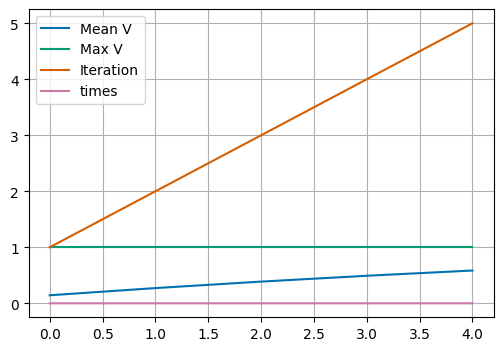

In [86]:
import pandas as pd

pd.DataFrame(record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])).plot()

# Gamma Experiments

max mean v 0.5850142857142858


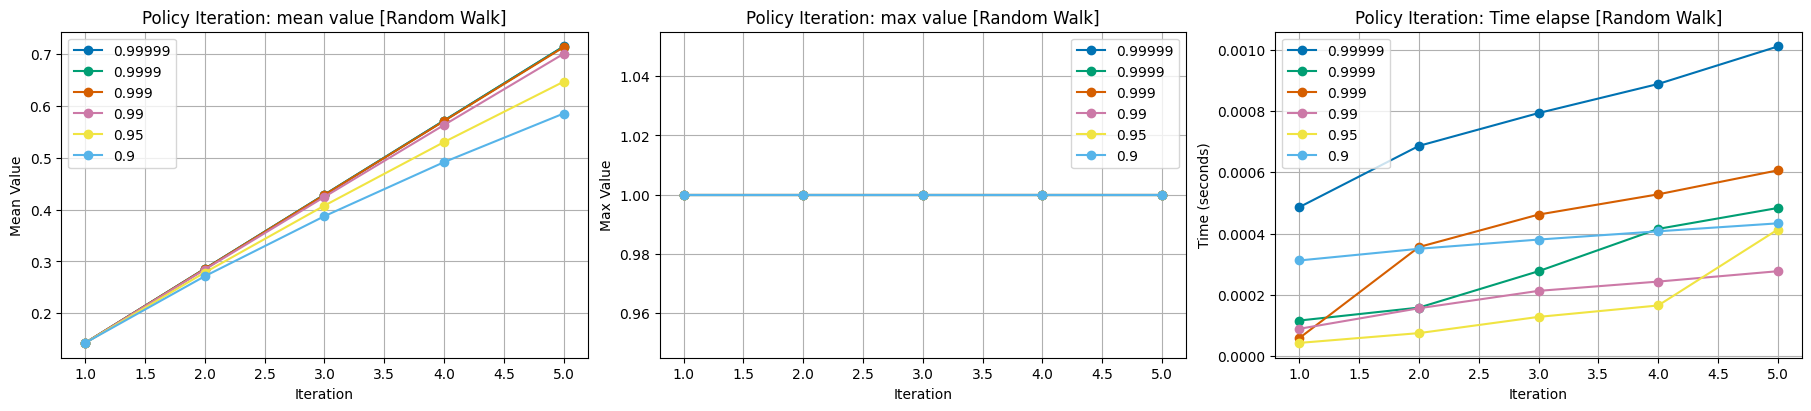

In [87]:
task = "Random Walk"
method = "Policy Iteration"
pi_results1 = []
style = "o-"
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.01, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    pi_results1.append(pi_result)
    num_iters = len(pi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))

magic_plot(pi_results1, task, method, style, x_list)

max mean v 0.5850142857142858


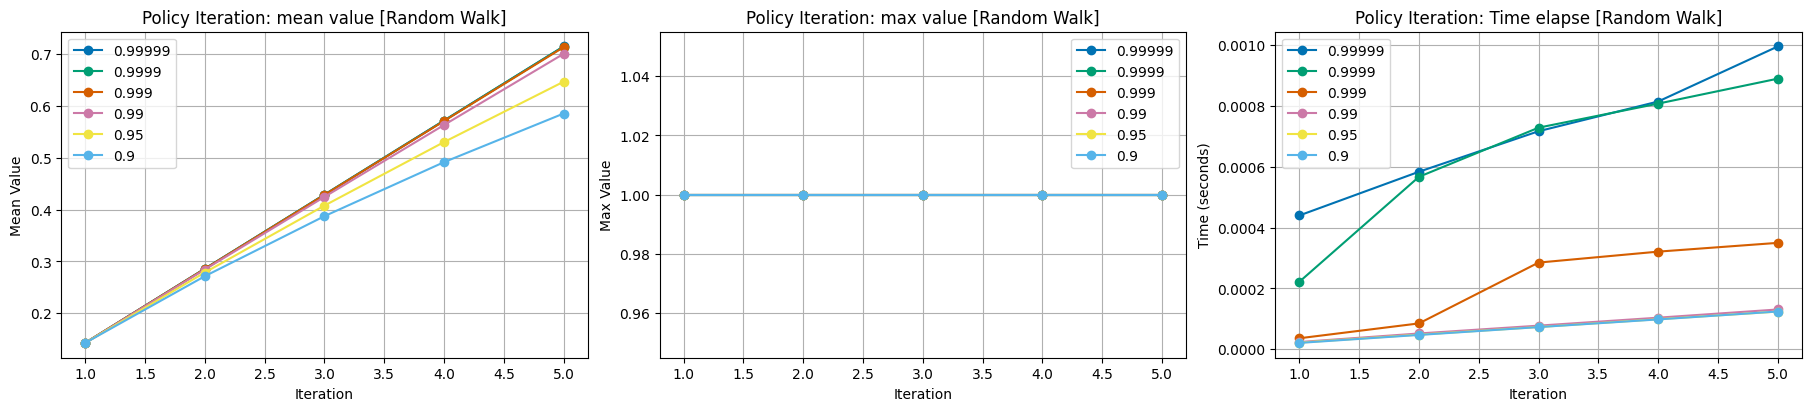

In [88]:
task = "Random Walk"
method = "Policy Iteration"
pi_results1 = []
style = "o-"
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    pi = mdp.PolicyIterationModified(**args)
    pi.run()

    pi_result = record(pi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    pi_results1.append(pi_result)
    num_iters = len(pi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))

magic_plot(pi_results1, task, method, style, x_list)

max mean v 0.5850142857142858


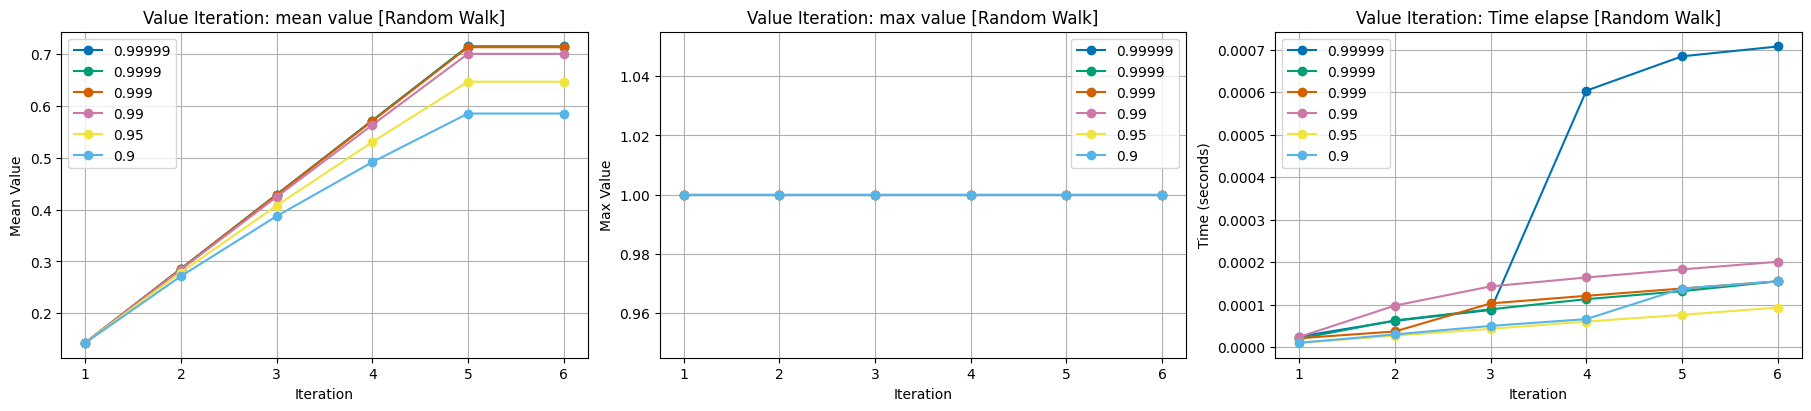

In [89]:
task = "Random Walk"
method = "Value Iteration"
vi_results1 = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.01, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.ValueIteration(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    vi_results1.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(vi_results1, task, method, style, x_list)

max mean v 0.5850142857142858


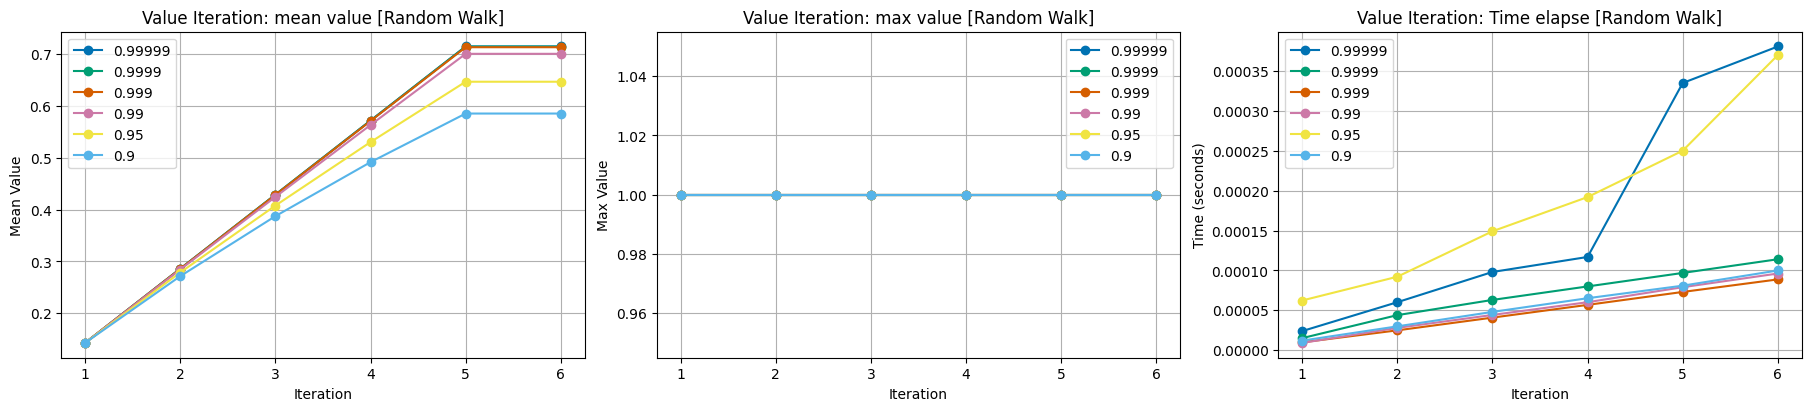

In [90]:
task = "Random Walk"
method = "Value Iteration"
vi_results1 = []
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.ValueIteration(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    vi_results1.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(vi_results1, task, method, style, x_list)

max mean v 0.5850142857142858


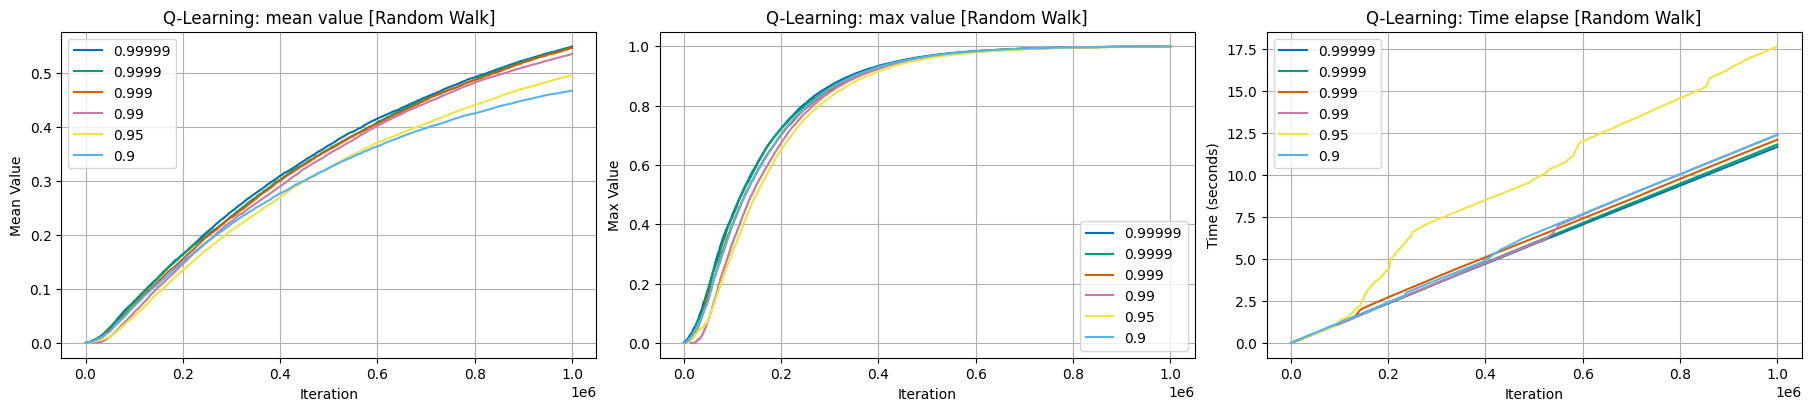

In [91]:
task = "Random Walk"
method = "Q-Learning"
q_results1 = []
style = "-"
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.01, "n_iter":10**6, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    vi_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results1.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(q_results1, task, method, style, x_list)

max mean v 0.5850142857142858


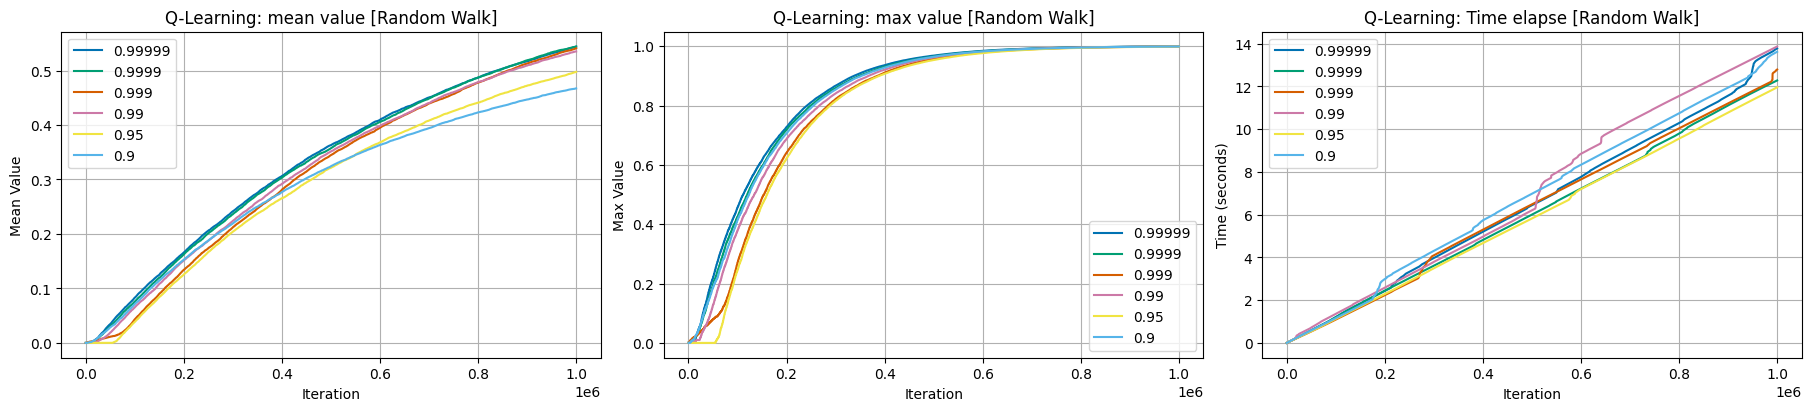

In [92]:
task = "Random Walk"
method = "Q-Learning"
q_results2 = []
style = "-"
x_list = [0.99999, 0.9999, 0.999, 0.99, 0.95, 0.9]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":x,"epsilon":0.1, "n_iter":10**6, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    vi_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results2.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(q_results2, task, method, style, x_list)

# Epsilon Experiment

max mean v 0.5850142857142858


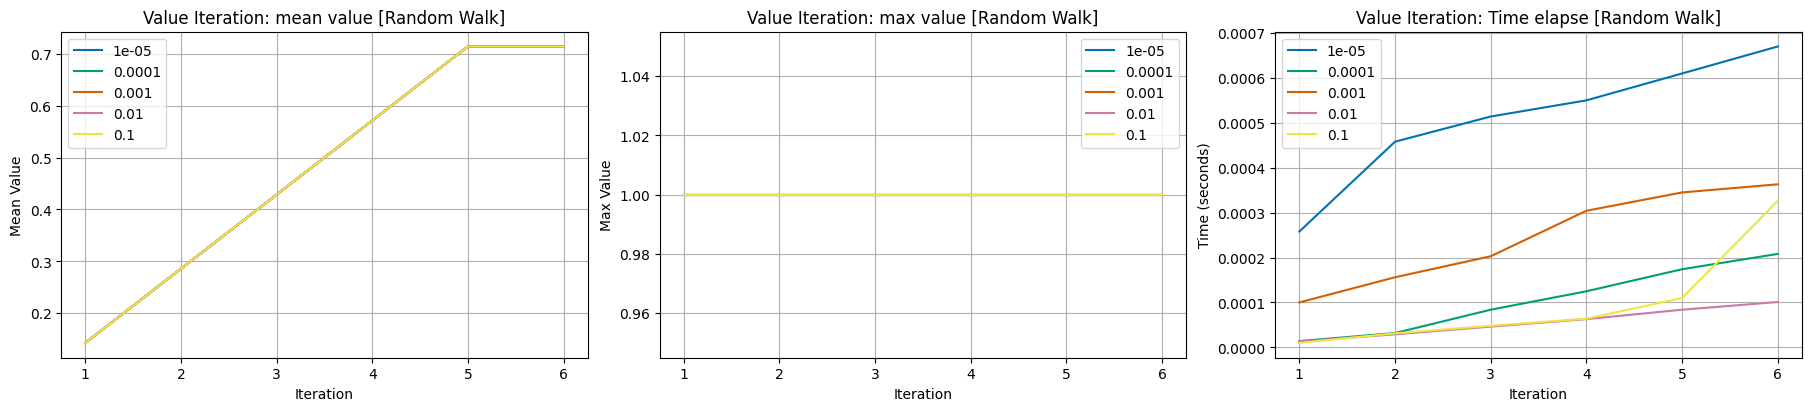

In [93]:
task = "Random Walk"
method = "Value Iteration"
vi_results3 = []
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1)]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.ValueIteration(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    vi_results3.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(vi_results3, task, method, style, x_list)

max mean v 0.5850142857142858


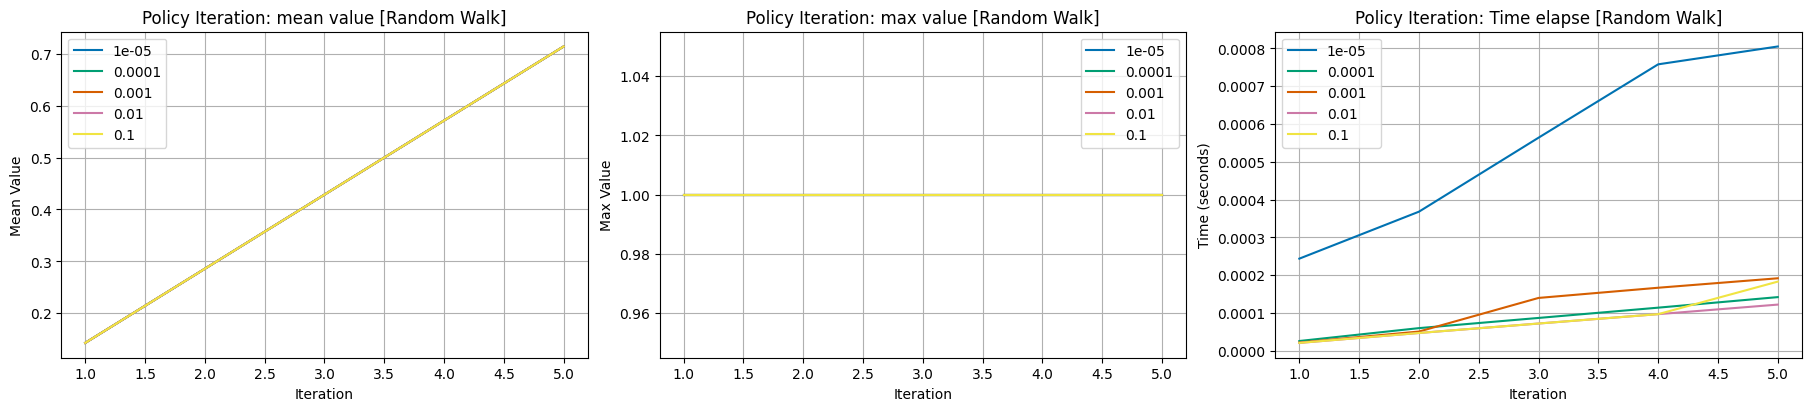

In [94]:
task = "Random Walk"
method = "Policy Iteration"
pi_results3 = []
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1)]
for x in x_list:
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "max_iter":10**5, "skip_check":True, "run_stat_frequency":1}
    vi = mdp.PolicyIterationModified(**args)
    vi.run()

    vi_result = record(vi.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    pi_results3.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(pi_results3, task, method, style, x_list)

max mean v 0.5850142857142858


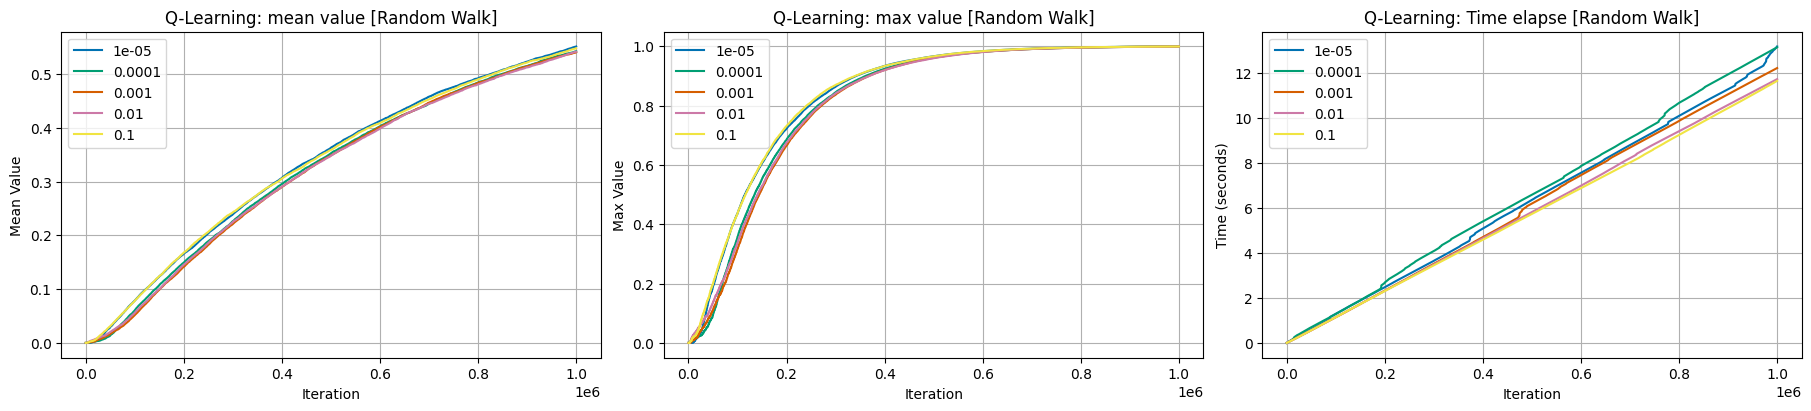

In [95]:
task = "Random Walk"
method = "Q-Learning"
q_results3 = []
style = "-"
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1)]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "n_iter":10**6, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    vi_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results3.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(q_results3, task, method, style, x_list)

max mean v 0.5850142857142858


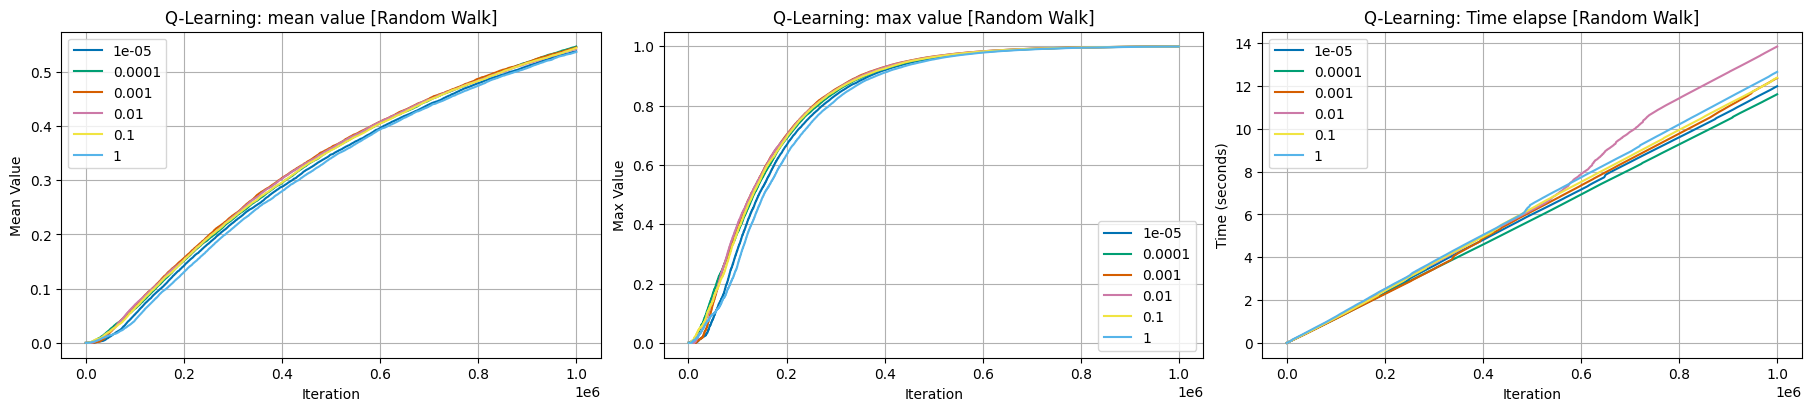

In [96]:
task = "Random Walk"
method = "Q-Learning"
q_results3 = []
style = "-"
x_list = [10**(-5),10**(-4), 10**(-3), 10**(-2), 10**(-1), 1]
for x in x_list:
    # args = {"transitions":P, "reward":R, "gamma":0.999,"epsilon":0.1, "max_iter":10**5, "skip_check":True}
    args = {"transitions":P, "reward":R, "gamma":0.9999,"epsilon":x, "n_iter":10**6, "skip_check":True}
    q = mdp.QLearning(**args)
    q.run()

    vi_result = record(q.run_stats, ["Mean V", "Max V", "Iteration", "times"])
    q_results3.append(vi_result)
    num_iters = len(vi_result["Mean V"])

print("max mean v", max(pi_result["Mean V"]))
magic_plot(q_results3, task, method, style, x_list)

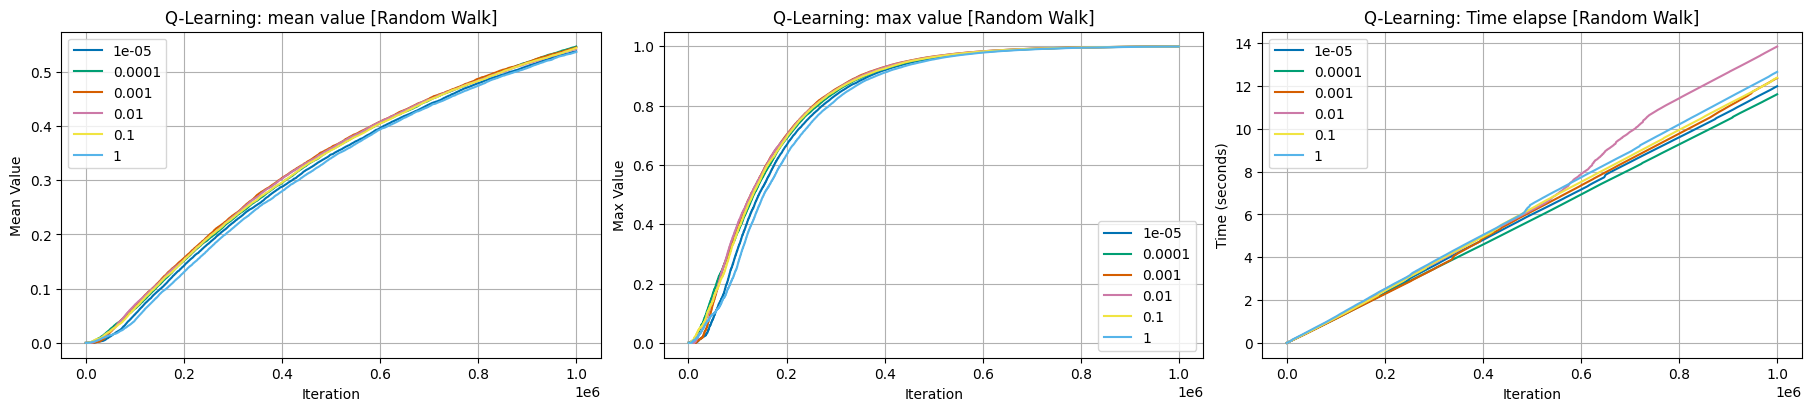

In [97]:
magic_plot(q_results3, task, method, style, x_list)

In [98]:
q.V

(0.0,
 0.2348739022476824,
 0.6390528074081647,
 0.8983444112626573,
 0.9840769498485978,
 0.9987243924728808,
 0.0)

In [99]:
def plot_heatmap_policy(policy, V, rows, columns):
    policy_labels = np.empty([rows, columns], dtype='<U10')
    for row in range(rows):
        for col in range(columns):
            state = row * columns + col
            policy_labels[row, col] += '<-' * (policy[state] == 0)
            policy_labels[row, col] += '->' * (policy[state] == 1)
    v = np.array(V)
    sns.heatmap(v.reshape(rows, columns), annot=policy_labels, fmt='', linewidths=.5)


def plot_heatmap_value_function(V, rows, columns):
    v = np.array(V)
    sns.heatmap(v.reshape(rows, columns), annot=True, fmt='.3f', linewidths=.5)

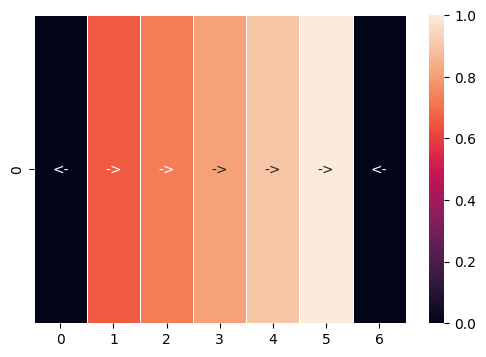

In [100]:
plot_heatmap_policy(pi.policy, pi.V, 1, 7)

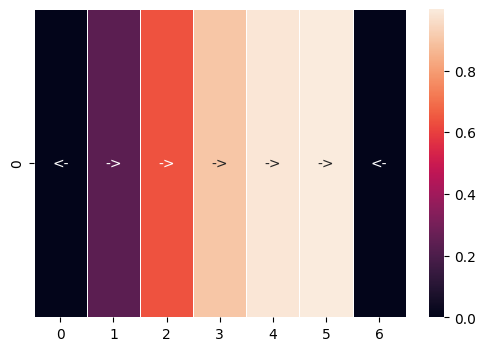

In [101]:
plot_heatmap_policy(q.policy, q.V, 1, 7)

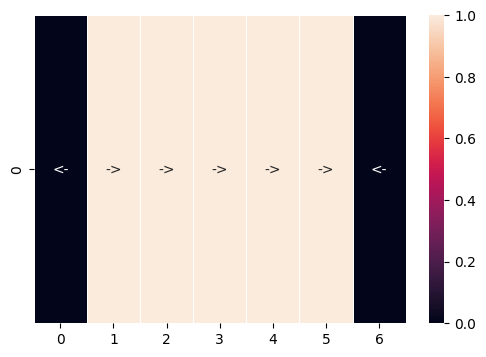

In [102]:
plot_heatmap_policy(vi.policy, vi.V, 1, 7)

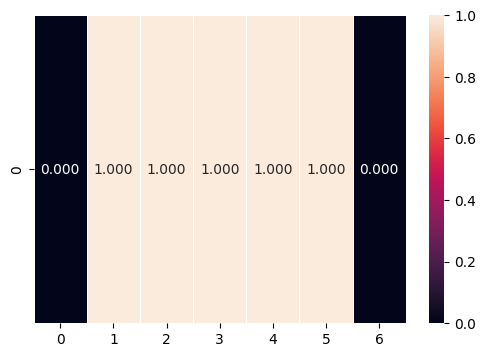

In [103]:
plot_heatmap_value_function(vi.V, 1, 7)

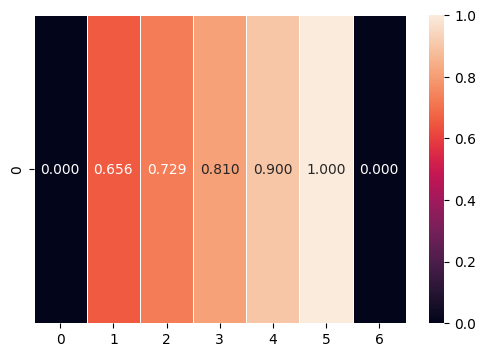

In [104]:
plot_heatmap_value_function(pi.V, 1, 7)

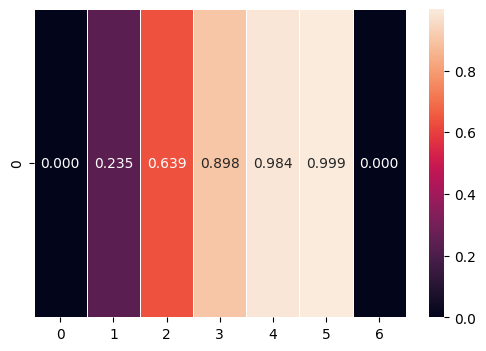

In [105]:
plot_heatmap_value_function(q.V, 1, 7)